In [21]:
!pip install numpy
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install scipy
!pip install seaborn
!pip install tensorflow
!pip install Flask

In [10]:
import os 
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Model
from keras.optimizers import Adam
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model
from keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img,img_to_array


In [15]:
! pip install kaggle


In [60]:
mkdir %USERPROFILE%\.kaggle


A subdirectory or file C:\Users\mduma\.kaggle already exists.


In [81]:
copy "C:\Users\mduma\Downloads\kaggle.json" "%USERPROFILE%\.kaggle"


        1 file(s) copied.


In [8]:
!kaggle datasets list


ref                                                          title                                                      size  lastUpdated                 downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  --------------------------------------------------  -----------  --------------------------  -------------  ---------  ---------------  
rakeshkapilavai/extrovert-vs-introvert-behavior-data         Extrovert vs. Introvert Behavior Data                     31277  2025-06-13 14:26:48.303000          22510        478  1.0              
bismasajjad/global-ai-job-market-and-salary-trends-2025      Global AI Job Market & Salary Trends 2025                529004  2025-06-01 07:20:49.537000          10809        197  0.9411765        
adilshamim8/social-media-addiction-vs-relationships          Students' Social Media Addiction                           7851  2025-05-10 14:38:02.713000          22930        341  1.0              
chaudharis

In [1]:
!kaggle datasets download -d phucthaiv02/butterfly-image-classification


Dataset URL: https://www.kaggle.com/datasets/phucthaiv02/butterfly-image-classification
License(s): CC0-1.0
butterfly-image-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [15]:
import zipfile
with zipfile.ZipFile('butterfly-image-classification.zip', 'r') as zip_ref:
    zip_ref.extractall('butterfly_dataset')

In [9]:
import os

# Print current working directory
print(os.getcwd())

C:\Users\mduma


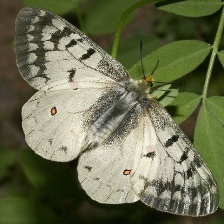

In [21]:
import random
from IPython.display import Image, display
folder_path = 'C:/Users/mduma/butterfly_dataset/test'
image_files = [ f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg')) ]
selected_image = random.choice(image_files)
image_path = os.path.join(folder_path, selected_image)
display(Image(filename = image_path))

In [27]:
train_path = 'C:/Users/mduma/butterfly_dataset/train'
test_path = 'C:/Users/mduma/butterfly_dataset/test'
train_datagen = ImageDataGenerator ( rescale = 1. / 255 , zoom_range = 0.2 , shear_range = 0.2 ) 
test_datagen = ImageDataGenerator ( rescale = 1. / 255 )
train = train_datagen.flow_from_directory (
    train_path, 
    target_size = (224,224),
    batch_size = 20
) 
test = test_datagen.flow_from_directory ( 
    test_path,
    target_size = (224,224),
    batch_size = 20
)



Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


In [59]:
import pandas as pd

train_df = pd.read_csv('C:/Users/mduma/butterfly_dataset/Training_set.csv')
test_df = pd.read_csv('C:/Users/mduma/butterfly_dataset/Testing_set.csv')


In [61]:
train_df['filename'] = 'C:/Users/mduma/butterfly_dataset/train/' + train_df['filename']
test_df['filename'] = 'C:/Users/mduma/butterfly_dataset/test/' + test_df['filename']


In [63]:
train_datagen = ImageDataGenerator(
    rescale = 1. / 255,
    zoom_range = 0.2,
    shear_range = 0.2,
    horizontal_flip = True,
    validation_split = 0.2
)
test_datagen = ImageDataGenerator( rescale = 1. / 255 )


In [65]:
train_generator = train_datagen.flow_from_dataframe(
    dataframe = train_df,
    x_col = 'filename',
    y_col = 'label',
    target_size = (224, 224),
    batch_size = 20,
    class_mode = 'categorical',
    subset = 'training',
    shuffle = True)
val_generator = train_datagen.flow_from_dataframe(
    dataframe = train_df,
    x_col = 'filename',
    y_col = 'label',
    target_size = (224, 224),
    batch_size = 20,
    class_mode = 'categorical',
    subset = 'validation',
    shuffle = True)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='filename',
    y_col=None,  # No labels for test
    target_size=(224, 224),
    batch_size=20,
    class_mode=None,
    shuffle=False)


Found 5200 validated image filenames belonging to 75 classes.
Found 1299 validated image filenames belonging to 75 classes.
Found 2786 validated image filenames.


In [66]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model


In [67]:
vgg = VGG16(include_top = False, input_shape = (224, 224, 3))

In [68]:
for layers in vgg.layers:
    print(layers)

<InputLayer name=input_layer_1, built=True>
<Conv2D name=block1_conv1, built=True>
<Conv2D name=block1_conv2, built=True>
<MaxPooling2D name=block1_pool, built=True>
<Conv2D name=block2_conv1, built=True>
<Conv2D name=block2_conv2, built=True>
<MaxPooling2D name=block2_pool, built=True>
<Conv2D name=block3_conv1, built=True>
<Conv2D name=block3_conv2, built=True>
<Conv2D name=block3_conv3, built=True>
<MaxPooling2D name=block3_pool, built=True>
<Conv2D name=block4_conv1, built=True>
<Conv2D name=block4_conv2, built=True>
<Conv2D name=block4_conv3, built=True>
<MaxPooling2D name=block4_pool, built=True>
<Conv2D name=block5_conv1, built=True>
<Conv2D name=block5_conv2, built=True>
<Conv2D name=block5_conv3, built=True>
<MaxPooling2D name=block5_pool, built=True>


In [69]:
len(vgg.layers)

19

In [70]:
for layers in vgg.layers:
    layers.trainable = False

In [71]:
x = Flatten()(vgg.output)

In [74]:
output = Dense(38, activation = 'softmax')(x)

In [81]:
vgg16 = Model(vgg.input,output)

In [83]:
vgg16.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │       953,382 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,668,070 (59.77 MB)

 Trainable params: 953,382 (3.64 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [85]:
# ✅ 1) First version (using preprocess_input)
img_path = "C:/Users/mduma/butterfly_dataset/train/Image_7.jpg"
import numpy as np
img = load_img ( img_path, target_size = ( 224, 224 ) )
x = img_to_array( img )
# Use this if you’re using a pre-trained VGG16
x = preprocess_input( x )
preds = vgg16.predict ( np.array ( [ x ] ) )
preds


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


array([[3.2595178e-09, 1.9615065e-10, 2.7988617e-05, 1.4651105e-21,
        2.6104338e-24, 6.0669235e-22, 5.7634701e-15, 3.9069459e-14,
        1.9025092e-19, 1.0351674e-16, 4.7070345e-18, 1.4836661e-12,
        8.9144127e-13, 9.8305165e-21, 6.2161082e-10, 1.2655673e-18,
        1.1220487e-16, 8.9857439e-15, 2.0541872e-14, 7.2728429e-10,
        7.0011852e-12, 9.9997187e-01, 2.0662596e-13, 9.8206279e-08,
        4.9959766e-16, 1.2606549e-14, 7.0846578e-20, 8.6126043e-24,
        1.3320027e-17, 4.8634516e-21, 2.7742473e-25, 2.2694063e-29,
        1.7605372e-23, 1.4436875e-09, 3.1808292e-29, 3.7990494e-28,
        2.3282105e-21, 6.5030474e-23]], dtype=float32)

In [89]:
labels[ np.argmax(preds) ]

NameError: name 'labels' is not defined

In [91]:
# ✅ 2) Second version (missing preprocessing)
from keras.preprocessing import image
import numpy as np
img_path = "C:\\Users\\mduma\\butterfly_dataset\\train\\Image_7.jpg"
img = image.load_img( img_path, target_size=(224, 224) )
img_array = image.img_to_array(img)
img_array = np.expand_dims( img_array, axis=0 )
predictions = vgg16.predict(img_array)
predicted_class_index = np.argmax(predictions, axis =1)[0]
predicted_class_name = labels[predicted_class_index]
print(f'Predicted Class Index:{predicted_class_index}')
print(f'Predicted Class Name:{predicted_class_name}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


NameError: name 'labels' is not defined

In [93]:
# ✅ 3) Third version (best structure)
img_path = "C:\\Users\\mduma\\butterfly_dataset\\train\\Image_7.jpg"
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
# Use this if you’re using a pre-trained VGG16
img_array = preprocess_input( img_array ) # Normalize
# Use this if you trained the model from scratch (it is manual normalization)
# img_array = img_array / 255.0  # Normalize
image_batch = np.expand_dims(img_array, axis=0)  # Only expand once!
# Make predictions
predictions = vgg16.predict(image_batch)
# Interpret prediction
predicted_class_index = np.argmax(predictions[0])
class_indices = train_generator.class_indices
labels = { v:k for k,v in class_indices.items() }
predicted_class_name = labels[ predicted_class_index ]
print('Predicted species:', predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
Predicted species: COMMON WOOD-NYMPH


In [95]:
from keras.applications import VGG16
vgg16.save('vgg16_model.h5')